In [1]:
import pandas as pd

# Load your CSV file into a Pandas DataFrame
data = pd.read_csv('./final_usd_exchange_rate_vs_stock_values.csv')

# Calculate the correlation coefficient between "Close (Rs.)" and "Buy Rate"
correlation = data['Close (Rs.)'].corr(data['Buy Rate'])

print("Correlation coefficient between Close (Rs.) and Buy Rate:", correlation)

Correlation coefficient between Close (Rs.) and Buy Rate: -0.020974633284467924


/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


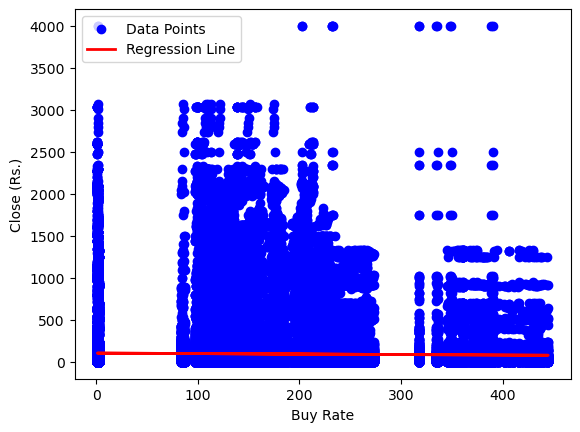

Regression Coefficients:
Slope (Coefficient): -0.05796461665571119
Intercept: 105.14548477556929


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load your CSV file into a Pandas DataFrame
data = pd.read_csv('final_usd_exchange_rate_vs_stock_values.csv')

# Extract the independent variable (X) and dependent variable (y)
X = data[['Buy Rate']]
y = data['Close (Rs.)']

# Create a linear regression model
model = LinearRegression()

# Fit the model to your data
model.fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the data points and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Buy Rate')
plt.ylabel('Close (Rs.)')
plt.legend()
plt.show()

# Get the regression coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

print("Regression Coefficients:")
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

In [4]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load your CSV file into a Pandas DataFrame
data = pd.read_csv('final_usd_exchange_rate_vs_stock_values.csv')

# Select the two columns for the Granger causality test
data_for_test = data[['Buy Rate', 'Close (Rs.)']]

# Perform the Granger causality test
max_lag = 3  # You can change this to a suitable lag value
test_result = grangercausalitytests(data_for_test, max_lag, verbose=True)

# Print the test results
for lag in range(1, max_lag + 1):
    print(f"Granger causality test at lag {lag}:")
    print(test_result[lag][0])
    print()

/Users/kelumrubasin/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=124.8733, p=0.0000  , df_denom=456676, df_num=1
ssr based chi2 test:   chi2=124.8742, p=0.0000  , df=1
likelihood ratio test: chi2=124.8571, p=0.0000  , df=1
parameter F test:         F=124.8733, p=0.0000  , df_denom=456676, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=59.7718 , p=0.0000  , df_denom=456673, df_num=2
ssr based chi2 test:   chi2=119.5449, p=0.0000  , df=2
likelihood ratio test: chi2=119.5293, p=0.0000  , df=2
parameter F test:         F=59.7718 , p=0.0000  , df_denom=456673, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=23.9380 , p=0.0000  , df_denom=456670, df_num=3
ssr based chi2 test:   chi2=71.8152 , p=0.0000  , df=3
likelihood ratio test: chi2=71.8095 , p=0.0000  , df=3
parameter F test:         F=23.9380 , p=0.0000  , df_denom=456670, df_num=3
Granger causality test at lag 1:
{'ssr_ftest': (124.87334462254016, 5.472147

Factor Loadings:
[[-1.44826226e-01  4.97232628e-05]
 [ 1.44826226e-01  4.97232628e-05]]


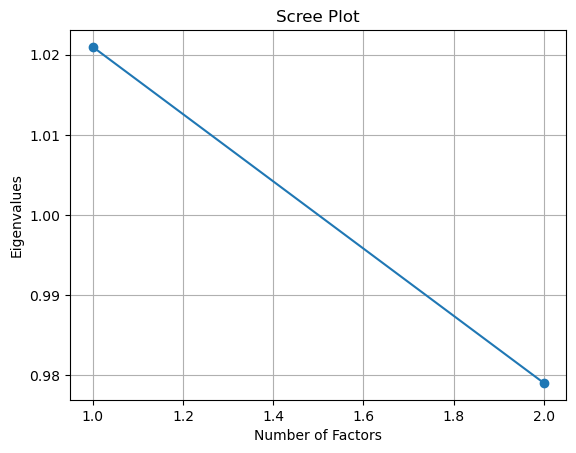

In [5]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Load your CSV file into a Pandas DataFrame
data = pd.read_csv('./final_usd_exchange_rate_vs_stock_values.csv')

# Select the variables for factor analysis
variables = data[['Close (Rs.)', 'Buy Rate']]

# Create a factor analysis object with the desired number of factors
n_factors = 2  # You can change this value based on your needs
fa = FactorAnalyzer(n_factors, rotation='varimax')

# Fit the factor analysis model to the data
fa.fit(variables)

# Get factor loadings
factor_loadings = fa.loadings_

# Print the factor loadings
print("Factor Loadings:")
print(factor_loadings)

# Plot the scree plot to help determine the number of factors
ev, v = fa.get_eigenvalues()
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title("Scree Plot")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalues")
plt.grid()
plt.show()